In [ ]:
"""
    A: Read data from 'ratings.csv'
"""

In [18]:
import pandas as pd

from surprise import Dataset
from surprise.reader import Reader
from surprise import KNNBasic, SVD
from surprise.model_selection import cross_validate

import matplotlib.pyplot as plt

import numpy as np

ratings = pd.read_csv(r'C:\Users\n8hou\Desktop\ratings_small.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

print(ratings.head())

reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0


In [ ]:
"""
    C: Compute the average MAE and RMSE of the PMF, Item-Based / User-Based Collaborative Filtering
    D: Compare the average MAE and RMSE of the PMF, Item-Based / User-Based Collaborative Filtering
"""

In [11]:
pmf = SVD()
res = cross_validate(pmf, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)

print('\nProbabilistic Matrix Factorization:')
print('Mean MAE: %f' % np.mean(res['test_mae']))
print('Mean RMSE: %f' % np.mean(res['test_rmse']))

itembased = KNNBasic(sim_options = { 'name': 'MSD', 'user_based': 'False'})
res = cross_validate(itembased, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)

print('\nItem Based:')
print('Mean MAE: %f' % np.mean(res['test_mae']))
print('Mean RMSE: %f' % np.mean(res['test_rmse']))

userbased = KNNBasic(sim_options = { 'name': 'MSD', 'user_based': 'True' })
res = cross_validate(userbased, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)

print('\nUser Based:')
print('Mean MAE: %f' % np.mean(res['test_mae']))
print('Mean RMSE: %f' % np.mean(res['test_rmse']))


Probabilistic Matrix Factorization:
Mean MAE: 0.690190
Mean RMSE: 0.897050
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

Item Based:
Mean MAE: 0.744982
Mean RMSE: 0.969452
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

User Based:
Mean MAE: 0.744527
Mean RMSE: 0.968955


In [ ]:
"""
    E: Examine how cosine, MSD, and pearson similarites impact the performance
        of User-Based / Item-Based Collaborative Filtering
"""

In [13]:
user_cosine = KNNBasic(sim_options = { 'name': 'cosine', 'user_based': 'True' })
user_msd = KNNBasic(sim_options = { 'name': 'MSD', 'user_based': 'True' })
user_pearson = KNNBasic(sim_options = { 'name': 'pearson', 'user_based': 'True' })

item_cosine = KNNBasic(sim_options = { 'name': 'cosine', 'user_based': 'False' })
item_msd = KNNBasic(sim_options = { 'name': 'MSD', 'user_based': 'False' })
item_pearson = KNNBasic(sim_options = { 'name': 'pearson', 'user_based': 'False' })

res_user_cosine = cross_validate(user_cosine, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
res_user_msd = cross_validate(user_msd, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
res_user_pearson = cross_validate(user_pearson, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)

res_item_cosine = cross_validate(item_cosine, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
res_item_msd = cross_validate(item_msd, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
res_item_pearson = cross_validate(item_pearson, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)

print('\nUser Based with Cosine Similarity: ')
print('Mean MAE: %f' % np.mean(res_user_cosine['test_mae']))
print('Mean RMSE: %f' % np.mean(res_user_cosine['test_rmse']))

print('\nUser Based with MSD: ')
print('Mean MAE: %f' % np.mean(res_user_msd['test_mae']))
print('Mean RMSE: %f' % np.mean(res_user_msd['test_rmse']))

print('\nUser Based with Pearson Similarity: ')
print('Mean MAE: %f' % np.mean(res_user_pearson['test_mae']))
print('Mean RMSE: %f' % np.mean(res_user_pearson['test_rmse']))

print('\nItem Based with Cosine Similarity: ')
print('Mean MAE: %f' % np.mean(res_item_cosine['test_mae']))
print('Mean RMSE: %f' % np.mean(res_item_cosine['test_rmse']))

print('\nItem Based with MSD: ')
print('Mean MAE: %f' % np.mean(res_item_msd['test_mae']))
print('Mean RMSE: %f' % np.mean(res_item_msd['test_rmse']))

print('\nItem Based with Pearson Similarity: ')
print('Mean MAE: %f' % np.mean(res_item_pearson['test_mae']))
print('Mean RMSE: %f' % np.mean(res_item_pearson['test_rmse']))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

User Based with K = 5
Mean MAE: 0.755035
Mean RMSE: 0.986777
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

User Based with K = 10
Mean MAE: 0.737811
Mean RMSE: 0.965372
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

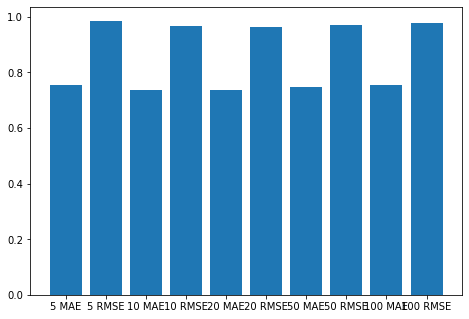

In [19]:
"""
    F: Examine how the number of neighbors impacts the performances of
        User-Based / Item-Based Collaborative Filtering
"""

userbased = [KNNBasic(sim_options = {'name': 'MSD'}, k=k) for k in [5, 10, 20, 50, 100]]

x = []
y = []

for method, k in zip(userbased, [5, 10, 20, 50, 100]):
    res = cross_validate(method, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)

    print('\nUser Based with K = %d' % k)
    print('Mean MAE: %f' % np.mean(res['test_mae']))
    print('Mean RMSE: %f' % np.mean(res['test_rmse']))
    
    x.append('%d MAE' % k)
    x.append('%d RMSE' % k)
    y.append(np.mean(res['test_mae']))
    y.append(np.mean(res['test_rmse']))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x,y)
plt.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

Item Based with K = 5
Mean MAE: 0.754019
Mean RMSE: 0.985341
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

Item Based with K = 10
Mean MAE: 0.739170
Mean RMSE: 0.965805
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

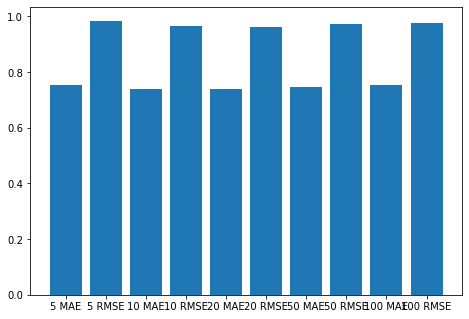

In [21]:
itembased = [KNNBasic(sim_options = {'name': 'MSD', 'user_based': 'False'}, k=k) for k in [5, 10, 20, 50, 100]]

x = []
y = []

for method, k in zip(itembased, [5, 10, 20, 50, 100]):
    res = cross_validate(method, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)

    print('\nItem Based with K = %d' % k)
    print('Mean MAE: %f' % np.mean(res['test_mae']))
    print('Mean RMSE: %f' % np.mean(res['test_rmse']))
    
    x.append('%d MAE' % k)
    x.append('%d RMSE' % k)
    y.append(np.mean(res['test_mae']))
    y.append(np.mean(res['test_rmse']))
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x,y)
plt.show()